Author: Bruce Chidley
PHIL 870 Final Paper/Project

In [1]:
#Import the necessary packages

import pandas as pd

import pynetlogo

import matplotlib.pyplot as plt

C:\Users\Bruce Chidley\AppData\Local\Temp\ipykernel_15624\2691220443.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Here, we establishg the link to NetLogo. It is important that the paths are changed to match the install paths of the user.

In [3]:
netlogo = pynetlogo.NetLogoLink(
    gui=False,
    jvm_path = 'C:\\Program Files\\Java\\jdk-21\\bin\\server\\jvm.dll',
    netlogo_home = 'C:/Program Files/NetLogo 6.4.0'
)

In [4]:
#Load in the NetLogo model

netlogo.load_model("C:/Users/Bruce Chidley/Documents/PHIL 870/individual_project/kingston_disease.nlogo")

In [23]:
results = pd.DataFrame(columns=['Susceptible Count', 'Exposed Count', 'Infectious Count', 'Recovered Count'])

In [24]:
#Set all parameter values

netlogo.command("set {0} {1}".format("basic-reproductive-ratio", 3.32))
netlogo.command("set {0} {1}".format("mean-exposed-time", 9))
netlogo.command("set {0} {1}".format("exposed-time-std", 2))
netlogo.command("set {0} {1}".format("mean-infectious-time", 16))
netlogo.command("set {0} {1}".format("infectious-time-std", 4))
netlogo.command("set {0} {1}".format("mean-recovered-time", 14))
netlogo.command("set {0} {1}".format("recovered-time-std", 2))
netlogo.command("set {0} {1}".format("mask-infection-factor", 0.9))
netlogo.command("set {0} {1}".format("vaccine-infection-factor", 0.5))
netlogo.command("set {0} {1}".format("isolation-rate", 0.3))
netlogo.command("set {0} {1}".format("bad-actor-proportion", 0))

In [25]:
#Run and save all values for the classes at each time step

netlogo.command("setup")

counts = netlogo.repeat_report(['total-susceptible-count', 'total-exposed-count', 'total-infectious-count', 'total-recovered-count'], 1000, include_t0=True)

results["Total Susceptible Count"] = (counts["total-susceptible-count"])
results["Total Exposed Count"] = (counts["total-exposed-count"])
results["Total Infectious Count"] = (counts["total-infectious-count"])
results["Total Recovered Count"] = (counts["total-recovered-count"])

In [26]:
time_list = []

for i in range (0, 1001):

    time_list.append(i)

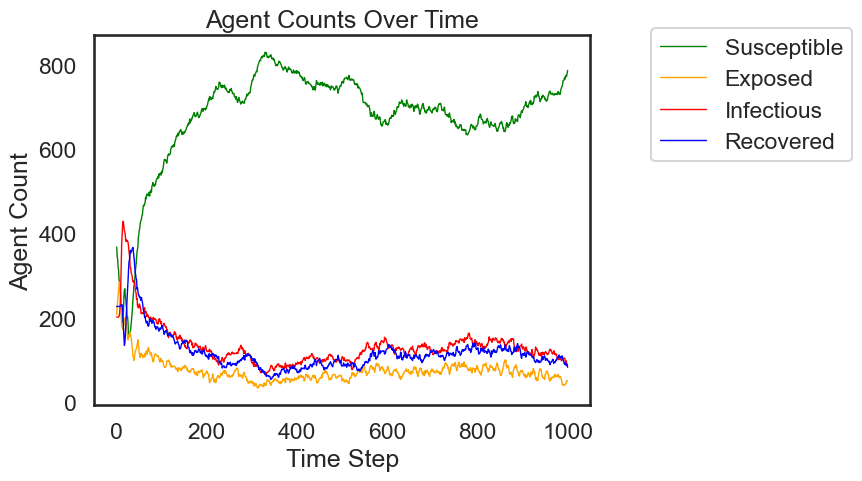

In [27]:
#Graph all classes on the same plot

plt.plot(time_list, results["Total Susceptible Count"], color="green", linewidth=1.0, label="Susceptible")
plt.plot(time_list, results["Total Exposed Count"], color="orange", linewidth=1.0, label="Exposed")
plt.plot(time_list, results["Total Infectious Count"], color="red", linewidth=1.0, label="Infectious")
plt.plot(time_list, results["Total Recovered Count"], color="blue", linewidth=1.0, label="Recovered")
plt.xlabel('Time Step')
plt.ylabel('Agent Count')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Agent Counts Over Time')
#plt.savefig('Sample_runs_normal', bbox_inches='tight')
plt.show()

Perform the exact same process here but with bad actor inclusion

In [6]:
results = pd.DataFrame(columns=['Susceptible Count', 'Exposed Count', 'Infectious Count', 'Recovered Count'])

In [7]:
netlogo.command("set {0} {1}".format("basic-reproductive-ratio", 3.32))
netlogo.command("set {0} {1}".format("mean-exposed-time", 9))
netlogo.command("set {0} {1}".format("exposed-time-std", 2))
netlogo.command("set {0} {1}".format("mean-infectious-time", 16))
netlogo.command("set {0} {1}".format("infectious-time-std", 4))
netlogo.command("set {0} {1}".format("mean-recovered-time", 14))
netlogo.command("set {0} {1}".format("recovered-time-std", 2))
netlogo.command("set {0} {1}".format("mask-infection-factor", 0.9))
netlogo.command("set {0} {1}".format("vaccine-infection-factor", 0.5))
netlogo.command("set {0} {1}".format("isolation-rate", 0.3))
netlogo.command("set {0} {1}".format("bad-actor-proportion", 0.2))

In [8]:
netlogo.command("setup")

counts = netlogo.repeat_report(['total-susceptible-count', 'total-exposed-count', 'total-infectious-count', 'total-recovered-count'], 1000, include_t0=True)

results["Total Susceptible Count"] = (counts["total-susceptible-count"])
results["Total Exposed Count"] = (counts["total-exposed-count"])
results["Total Infectious Count"] = (counts["total-infectious-count"])
results["Total Recovered Count"] = (counts["total-recovered-count"])

In [9]:
time_list = []

for i in range (0, 1001):

    time_list.append(i)

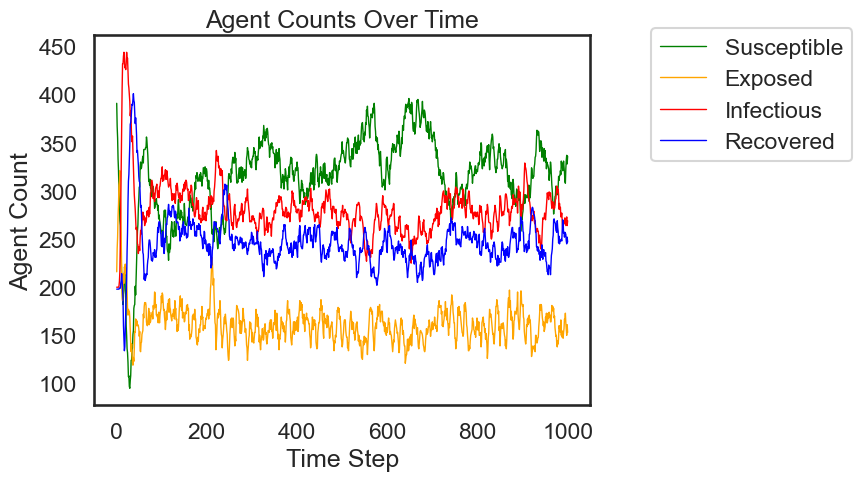

In [17]:
plt.plot(time_list, results["Total Susceptible Count"], color="green", linewidth=1.0, label="Susceptible")
plt.plot(time_list, results["Total Exposed Count"], color="orange", linewidth=1.0, label="Exposed")
plt.plot(time_list, results["Total Infectious Count"], color="red", linewidth=1.0, label="Infectious")
plt.plot(time_list, results["Total Recovered Count"], color="blue", linewidth=1.0, label="Recovered")
plt.xlabel('Time Step')
plt.ylabel('Agent Count')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Agent Counts Over Time')
#plt.savefig('Sample_runs_bad_actors', bbox_inches='tight')
plt.show()